# 1 - Introduction

Milestone 2

Nama : Samuel Christian S

Batch : SBY-001

Data : (Obesity_Classification) https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset

Deployment : https://huggingface.co/spaces/Samchriss94/Obesity

Objective : This dataset contains information about the obesity classification of individuals. 

# 2 - Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

#model
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
#evaluasi Logistics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

#save model
import pickle
import json

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) 

# 3 - Data Loading

In [2]:
# load data asli
df_ori = pd.read_csv('Obesity_Classification.csv')
df = df_ori.copy()

In [3]:
df.head(10)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
5,6,50,Female,140,40,16.7,Underweight
6,7,55,Male,200,110,34.2,Obese
7,8,60,Female,130,30,13.3,Underweight
8,9,65,Male,210,120,37.2,Obese
9,10,70,Female,120,20,10.0,Underweight


Data di atas merupakan tampilan dari data csv yang telah diload dan data di yang ditampilkan di atas adalah 10 data teratas dari dataset.

In [4]:
df.tail(10)

,ID,Age,Gender,Height,Weight,BMI,Label
98,101,37,Female,140,25,10.0,Underweight
99,102,42,Male,200,30,13.3,Underweight
100,103,47,Female,130,30,13.3,Underweight
101,104,52,Male,210,35,16.7,Underweight
102,105,57,Female,120,25,10.0,Underweight
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight
107,110,31,Male,190,20,8.3,Underweight


Data di atas merupakan tampilan dari data csv yang telah diload dan data di yang ditampilkan di atas adalah 10 data terbawah dari dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [6]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [7]:
df.duplicated().sum()

0

## 3.1 - Colomn Creation

In [8]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

# 4 - Exploratory Data Analysis (EDA)

## 4.1 - EDA Target

In [9]:
df.Label.value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

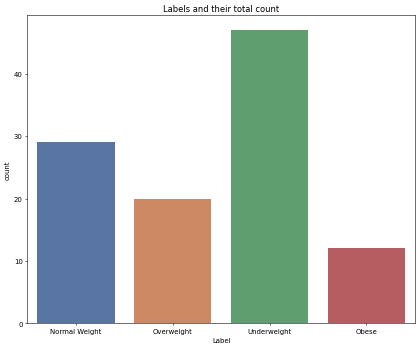

In [10]:
fig = plt.figure(figsize=(10,8),dpi=50)
sns.countplot(data=df,x='Label',palette='deep')
plt.title('Labels and their total count');

Dari data di atas diketahui Terdapat 47 individu yang termasuk dalam kelompok underweight. Ini menunjukkan bahwa sebagian besar orang dalam sampel memiliki berat badan di bawah batas berat badan yang sehat. Sebanyak 29 orang masuk ke dalam Berat Badan Normal ini. Ini berarti bahwa sejumlah kecil orang dalam sampel memiliki berat badan yang sesuai dengan tinggi badan mereka, atau berada dalam kisaran berat badan yang sehat. selain itu Terdapat 20 individu yang termasuk Overweight. Ini menunjukkan bahwa sejumlah orang dalam sampel memiliki berat badan lebih dari yang seharusnya, tetapi belum mencapai tingkat obesitas. dan yang terakhir  Ada 12 orang Obesitas. Ini mengindikasikan bahwa sejumlah kecil orang dalam sampel memiliki berat badan yang jauh melebihi batas berat badan yang sehat, dan mereka termasuk dalam kategori obesitas

## 4.2 - EDA Numerical

### 4.2.1 - EDA kolom BMI

In [11]:
bmi_stats = df['BMI'].describe()
print(bmi_stats)

count    108.000000
mean      20.549074
std        7.583818
min        3.900000
25%       16.700000
50%       21.200000
75%       26.100000
max       37.200000
Name: BMI, dtype: float64


In [12]:
# Group data berdasarkan label badan
grouped = df.groupby("Label")

# Hitung statistik BMI (min, max, mean) untuk tiap kategori badan
bmi_stats = grouped["BMI"].agg(["min", "max", "mean"])
bmi_stats

,min,max,mean
Label,,,
Normal Weight,21.2,25.3,22.834483
Obese,28.9,37.2,32.341667
Overweight,25.0,29.1,26.600000
Underweight,3.9,20.0,13.553191


Dari data di atas terlihat statistik BMI (minimum, maksimum, rata-rata) untuk empat kategori berdasarkan Label Badan (Normal Weight, Obese, Overweight, Underweight).

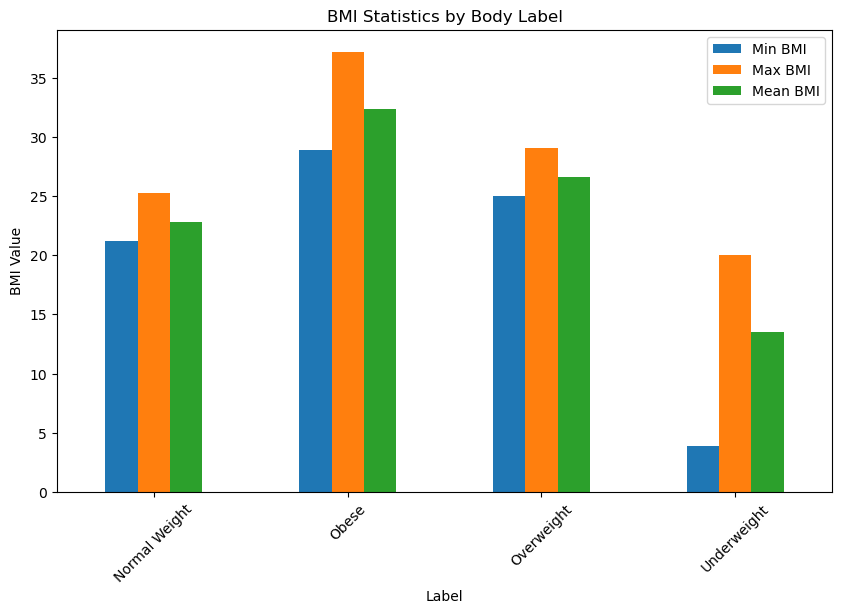

In [13]:
# Plot grafik
bmi_stats.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Label")
plt.ylabel("BMI Value")
plt.title("BMI Statistics by Body Label")
plt.xticks(rotation=45)
plt.legend(["Min BMI", "Max BMI", "Mean BMI"])
plt.show()

Dari grafik di atas dapat dilihat setiap kategori berdasarkan Label Badan memiliki nilai BMI yang berbeda-beda, yang mencerminkan beragamnya kondisi fisik individu dalam setiap kategori.

In [14]:
correlation = df['BMI'].corr(df['Weight'])
print(f"Korelasi antara BMI dan Weight: {correlation}")

Korelasi antara BMI dan Weight: 0.9728293471649844


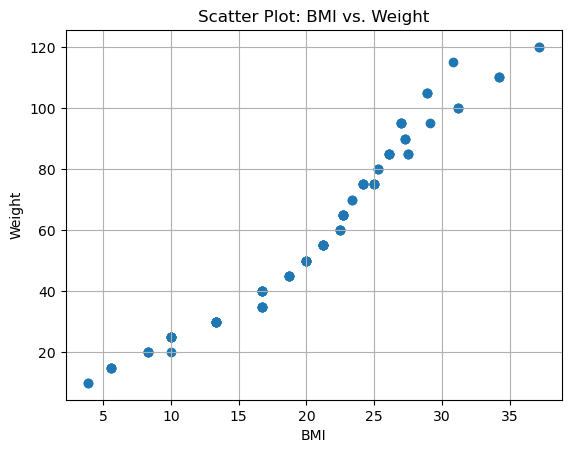

In [15]:
fig = plt.scatter(df['BMI'], df['Weight'])
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.title('Scatter Plot: BMI vs. Weight')
plt.grid(True)
plt.show()

Korelasi sebesar 0.9728 adalah nilai yang mendekati 1. Ini menunjukkan bahwa ada hubungan positif yang sangat kuat antara BMI dan berat badan. Dalam konteks ini, semakin tinggi nilai BMI seseorang, semakin tinggi pula berat badan mereka. Sebaliknya, semakin rendah nilai BMI, semakin rendah pula berat badan. Dengan kata lain, data menunjukkan bahwa individu dengan nilai BMI yang tinggi cenderung memiliki berat badan yang tinggi, sementara individu dengan nilai BMI yang rendah cenderung memiliki berat badan yang rendah. Hubungan positif yang kuat ini menunjukkan bahwa BMI dan berat badan cenderung bergerak seiring satu sama lain, dan perubahan dalam satu variabel akan mengakibatkan perubahan yang sejalan dalam variabel lainnya.

### 4.2.2 - EDA kolom Height

In [16]:
height_stats = df['Height'].describe()
print(height_stats)

count    108.000000
mean     166.574074
std       27.873615
min      120.000000
25%      140.000000
50%      175.000000
75%      190.000000
max      210.000000
Name: Height, dtype: float64


[Text(0.5, 1.0, 'Height')]

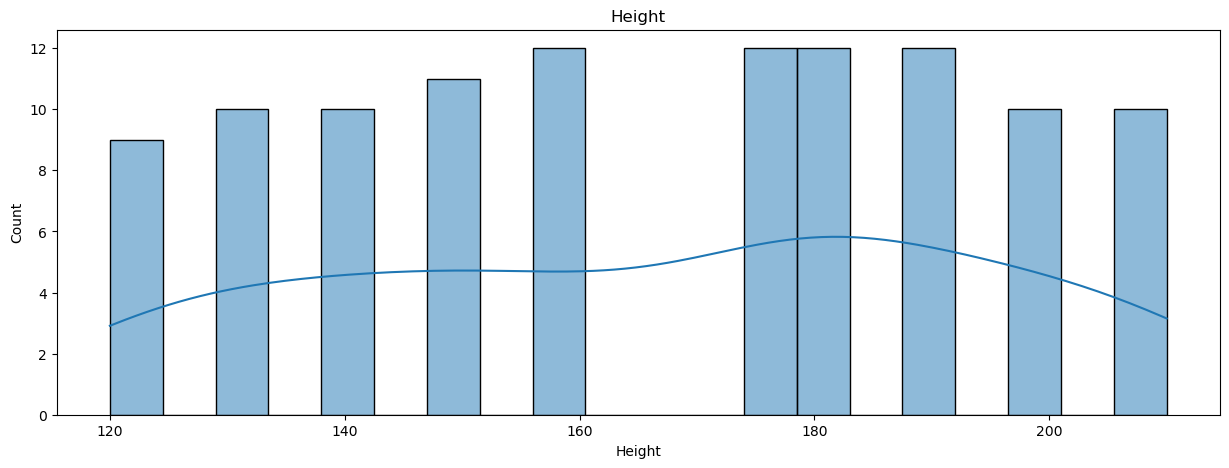

In [17]:
fig = plt.figure(figsize=(15,5))
sns.histplot(df['Height'], bins=20, kde=True).set(title='Height')

In [40]:
df.Height.unique

<bound method Series.unique of 0      175
1      160
2      180
3      150
4      190
      ... 
103    175
104    160
105    180
106    150
107    190
Name: Height, Length: 108, dtype: int64>

Dari data di atas dapat diketahui bahwa tinggi maksimal dari data ini adalah 210 cm dan yang paling pendek atau rendah adalah 120 cm

### 4.2.3 - EDA kolom Weight

In [18]:
weight_stats = df['Weight'].describe()
print(weight_stats)

count    108.000000
mean      59.490741
std       28.856233
min       10.000000
25%       35.000000
50%       55.000000
75%       85.000000
max      120.000000
Name: Weight, dtype: float64


[Text(0.5, 1.0, 'Weight')]

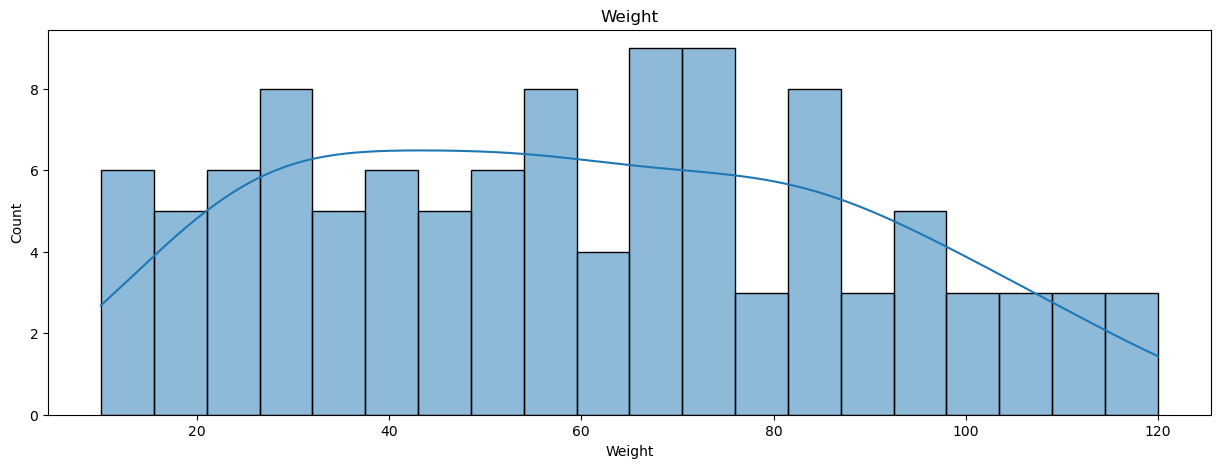

In [19]:
fig = plt.figure(figsize=(15,5))
sns.histplot(df['Weight'], bins=20, kde=True).set(title='Weight')

dari data di atas dapat dilihat rata2 berat dari total 108 orang adalah 58 kg dan untuk orang yang paling berat ada pada 120 kg dan yang apling ringan ada pada 10 kg .

In [20]:
# Statistik Deskriptif
descriptive_stats = df[['Height', 'Weight']].describe()
print(descriptive_stats)

           Height      Weight
count  108.000000  108.000000
mean   166.574074   59.490741
std     27.873615   28.856233
min    120.000000   10.000000
25%    140.000000   35.000000
50%    175.000000   55.000000
75%    190.000000   85.000000
max    210.000000  120.000000


In [21]:
correlation = df['Height'].corr(df['Weight'])
print(f"Korelasi antara Height dan Weight: {correlation}")

Korelasi antara Height dan Weight: 0.42888994951330006


Korelasi antara Height (tinggi badan) dan Weight (berat badan) sebesar 0.4289 menunjukkan bahwa ada hubungan positif yang lemah antara dua variabel ini. Nilai korelasi positif mengindikasikan bahwa dalam contoh data ini ada kecenderungan umum di mana individu yang lebih tinggi cenderung memiliki berat badan yang lebih tinggi. Namun, hubungan ini tidak begitu kuat.

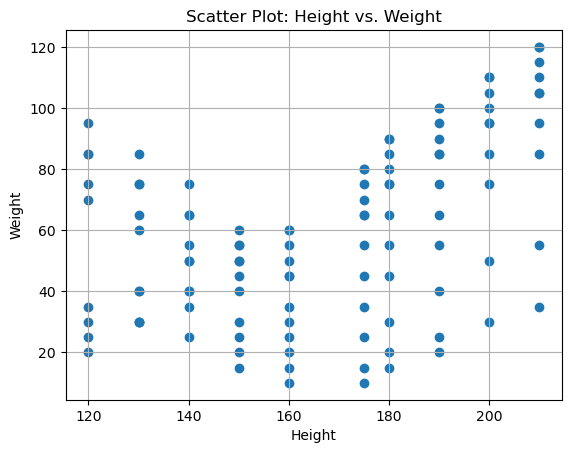

In [22]:
fig = plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot: Height vs. Weight')
plt.grid(True)
plt.show()

Korelasi antara Height dan Weight: 0.42888994951330006


Text(166.57407407407408, 59.49074074074074, 'Korelasi: 0.43')

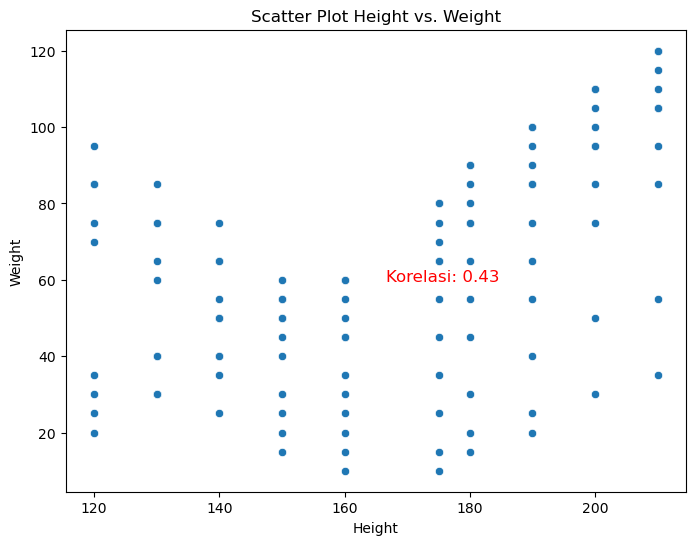

In [32]:
# Menghitung korelasi antara Height dan Weight
correlation = df['Height'].corr(df['Weight'])

# Mencetak nilai korelasi
print(f"Korelasi antara Height dan Weight: {correlation}")

# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Weight')
plt.title('Scatter Plot Height vs. Weight')

# Menambahkan label titik korelasi ke plot
plt.annotate(f'Korelasi: {correlation:.2f}', xy=(df['Height'].mean(), df['Weight'].mean()), fontsize=12, color='red')

In [34]:
table_data = df[['Height', 'Weight']]

In [35]:
table_data

,Height,Weight
0,175,80
1,160,60
2,180,90
3,150,50
4,190,100
...,...,...
103,175,10
104,160,10
105,180,15
106,150,15


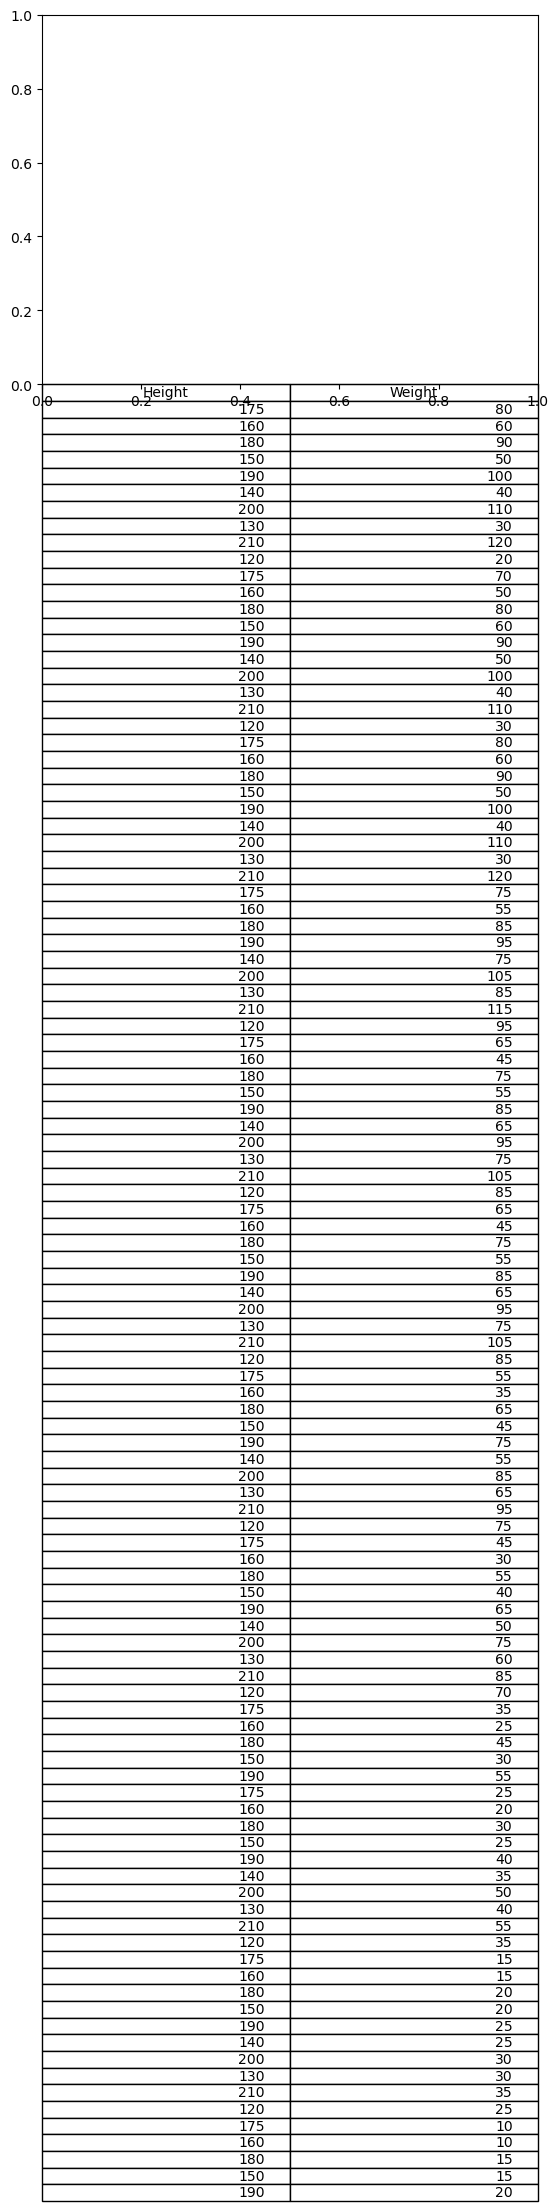

In [33]:
table_data = df[['Height', 'Weight']]
plt.table(cellText=table_data.values, colLabels=['Height', 'Weight'], loc='bottom')

Nilai korelasi sekitar 0.4289 menunjukkan bahwa ada variasi dalam data yang tidak dapat dijelaskan oleh hubungan antara tinggi badan dan berat badan. Dengan kata lain, masih banyak faktor lain yang dapat memengaruhi berat badan selain tinggi badan

## 4.3 - EDA Data Kategorial

### 4.3.1 - EDA kolom Nominal 

### 4.3.1.1 - EDA kolom Age

In [23]:
age_stats = df['Age'].describe()
print(age_stats)

count    108.000000
mean      46.555556
std       24.720620
min       11.000000
25%       27.000000
50%       42.500000
75%       59.250000
max      112.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Distribution of Age with weight labels')

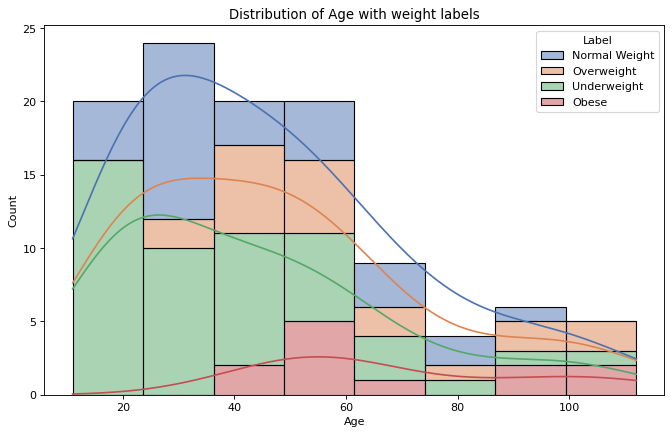

In [41]:
fig = plt.figure(figsize=(10,6),dpi=80)
sns.histplot(data=df,x='Age',kde=True,hue='Label',multiple='stack',palette='deep')
plt.title('Distribution of Age with weight labels')

In [ ]:
data

dari data disini terlihat bawha usia paling mudah adalah 10 tahun dan yang paling tua adalah 112 tahun dan juga dari grafik di atas terlihat Semua penderita obesitas berusia 40 tahun ke atas.

In [25]:
correlation = df['Age'].corr(df['BMI'])
print(f"Korelasi antara Age dan BMI: {correlation}")

Korelasi antara Age dan BMI: 0.474185098221011


Nilai korelasi positif menunjukkan bahwa dalam sampel tersebut, ada kecenderungan umum di mana usia yang lebih tinggi cenderung berhubungan dengan nilai BMI yang lebih tinggi, meskipun hubungan ini tidak kuat.

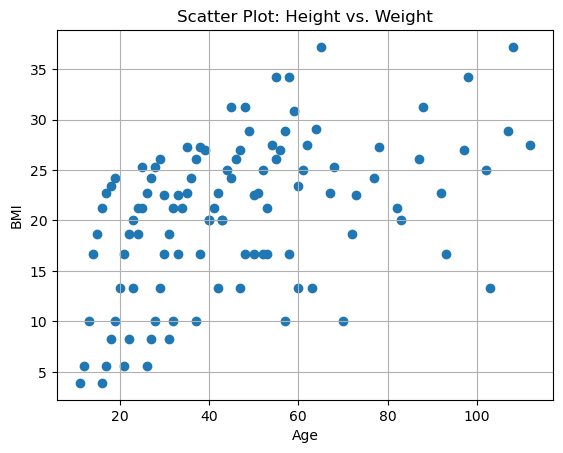

In [26]:
fig = plt.scatter(df['Age'], df['BMI'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot: Height vs. Weight')
plt.grid(True)
plt.show()

dari grafik di atas menunjukkan bahwa ada variasi dalam data yang tidak dapat dijelaskan oleh hubungan antara usia dan BMI. Artinya, masih ada faktor-faktor lain yang memengaruhi nilai BMI selain usia. Oleh karena itu, korelasi ini menunjukkan bahwa terdapat sejenis hubungan positif antara usia dan BMI dalam data ini, tetapi tidak cukup kuat untuk mengatakan bahwa usia adalah faktor penentu utama BMI, dan masih ada banyak faktor lain yang perlu dipertimbangkan.

### 4.3.1.2 - EDA kolom Gender

In [27]:
df.Gender.value_counts()

Male      56
Female    52
Name: Gender, dtype: int64

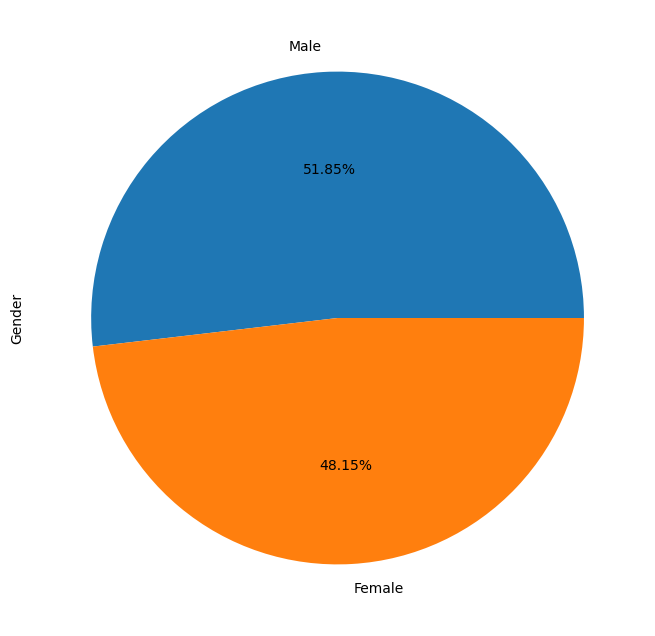

In [28]:
fig,ax1 = plt.subplots(figsize=(8,8))
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Dari total 108 data di atas didominasi oleh lak-laki dengan 51.82 % atau 56 orang pria dan 48.15% atau 52 orang perempuan.

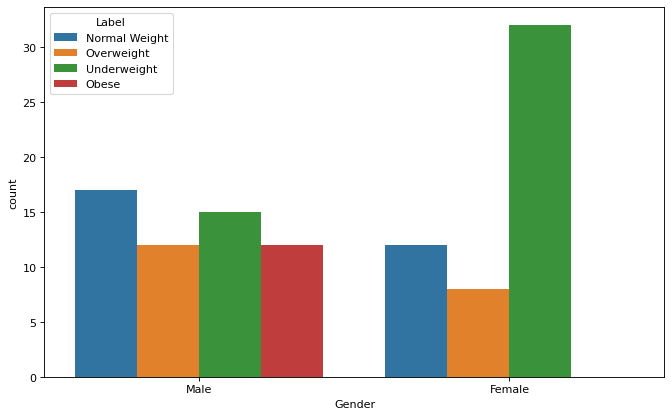

In [28]:
fig = plt.figure(figsize=(10,6),dpi=80)
ax=sns.countplot(data =df , x = "Gender", hue ='Label')

In [31]:
# Statistik Deskriptif
descriptive_stats = df[['Gender', 'Label']].value_counts()
print(descriptive_stats)

Gender  Label        
Female  Underweight      32
Male    Normal Weight    17
        Underweight      15
Female  Normal Weight    12
Male    Obese            12
        Overweight       12
Female  Overweight        8
dtype: int64


Dari grafik diatas dapat dilihat bahwa laki-laki dalam kumpulan data diatas  terdistribusi secara normal di semua kategori, tetapi untuk perempuan, kategori terbesar adalah berat badan kurang dan dapat dilihat bahwa tidak ada bagian yang mengalami obesitas.

# 5 - Feature Engineering

Bedasarkan EDA maka kolom yang digunakan adalah sebagai berikut : 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'

In [30]:
df[['Age' , 'Gender' , 'Height' , 'Weight' , 'BMI' , 'Label']]

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


## 5.1 - Split Features(X) dan target (y)

In [31]:
# Define X (features) and y (target variable)
X = df[['Age', 'Gender', 'Height', 'Weight', 'BMI']]
y = df['Label']

## 5.2 - Split Train set and Test set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)
print('Train Size:' , X_train.shape)
print('Test Size:' , X_test.shape)
X_train

Train Size: (86, 5)
Test Size: (22, 5)


,Age,Gender,Height,Weight,BMI
11,23,Female,160,50,20.0
83,13,Male,175,25,10.0
23,83,Female,150,50,20.0
91,53,Male,210,55,21.2
35,54,Female,130,85,27.5
...,...,...,...,...,...
43,42,Female,140,65,22.7
22,78,Male,180,90,27.3
72,35,Male,190,65,22.7
15,43,Female,140,50,20.0


## 5.3 - Handling Outlier

In [33]:
print('Distribution of column `Limit Height`  : ', X_train['Height'].skew())
print('Distribution of column `Limit Weight`  : ', X_train['Weight'].skew())
print('Distribution of column `Limit BMI`  : ', X_train['BMI'].skew())

Distribution of column `Limit Height`  :  -0.05965016401743616
Distribution of column `Limit Weight`  :  0.30971578586904225
Distribution of column `Limit BMI`  :  -0.23572464228466095


Setelah dilakukan pengeckan pada nilai distribusi dari Heigh, Weight dan BMi diketahui nilai ada pada rentang -0,5 sampai 0,5 sehingga dapat disimpulkan data dari kolom Height, Weight, dan BMI terdistribusi dengan Normal. karena nilai normal selanjutkan akan dilakukan handling outlier menggunakan Z-Score

### 5.3.1 - Outlier Height with Z-Score

In [34]:
avg = df['Height'].mean()
std = df['Height'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

outlier = df['Height'][(df['Height']<low_bound) | (df['Height']>up_bound)]

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')
print(f'Percentage of outliers: {len(outlier)*100/len(df["Height"]):.2f}%%')

Upper Boundary: 250.19
Lower Boundary: 82.95
Percentage of outliers: 0.00%%


Dari data di atas dapat menunjukkan bahwa, dalam data tersebut, tidak ada outlier yang teridentifikasi berdasarkan batas atas dan batas bawah yang telah ditentukan pada kolom height

### 5.3.2 - Outlier Weight with Z-Score

In [35]:
avg = df['Weight'].mean()
std = df['Weight'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

outlier = df['Weight'][(df['Weight']<low_bound) | (df['Weight']>up_bound)]

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')
print(f'Percentage of outliers: {len(outlier)*100/len(df["Weight"]):.2f}%%')

Upper Boundary: 146.06
Lower Boundary: -27.08
Percentage of outliers: 0.00%%


Dari data di atas dapat menunjukkan bahwa, dalam data tersebut, tidak ada outlier yang teridentifikasi berdasarkan batas atas dan batas bawah yang telah ditentukan pada kolom weight

### 5.3.3 - Outlier BMI with Z-Score

In [36]:
avg = df['BMI'].mean()
std = df['BMI'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

outlier = df['BMI'][(df['BMI']<low_bound) | (df['BMI']>up_bound)]

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')
print(f'Percentage of outliers: {len(outlier)*100/len(df["BMI"]):.2f}%%')

Upper Boundary: 43.30
Lower Boundary: -2.20
Percentage of outliers: 0.00%%


Dari data di atas dapat menunjukkan bahwa, dalam data tersebut, tidak ada outlier yang teridentifikasi berdasarkan batas atas dan batas bawah yang telah ditentukan pada kolom BMI

## 5.4 - Handling Missing Values

In [37]:
# Check X_train
X_train.isnull().sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
dtype: int64

In [38]:
# Check X_test
X_test.isnull().sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
dtype: int64

In [39]:
# Check y_train
y_train.isnull().sum()

0

In [40]:
# Check y_test
y_test.isnull().sum()

0

## 5.5 - Split numerical column and categorical column

In [41]:
#Define kolom numerikal dan kategorial
num_col = ['Height' , 'Weight' , 'BMI']
cat_cal = ['Age', 'Gender']

#Define kolom kategorial nominal dan ordinal
num_col_n = ['Height' , 'Weight' , 'BMI']
cat_cal_n = ['Age', 'Gender']

In [42]:
# Split between num col and cat col in Train and Test set

X_train_num_n = X_train[num_col_n]
X_train_cat = X_train[cat_cal]
X_train_cat_n = X_train[cat_cal_n]

X_test_num_n = X_test[num_col_n]
X_test_cat = X_test[cat_cal]
X_test_cat_n = X_test[cat_cal_n]

## 5.6 - Feature Scalling

In [43]:
# Show Central Tendency
X_train_num_n.describe()

,Height,Weight,BMI
count,86.000000,86.000000,86.000000
mean,165.581395,56.802326,19.974419
std,27.625847,27.758547,7.375750
min,120.000000,10.000000,3.900000
25%,140.000000,35.000000,16.700000
50%,175.000000,55.000000,21.200000
75%,190.000000,75.000000,25.000000
max,210.000000,120.000000,37.200000


### 5.6.1 - Scalling Skew Data Normal

In [44]:
# Feature scaling normal data
scaler = StandardScaler()
scaler.fit(X_train_num_n)

StandardScaler()

In [45]:
# Feature scaling normal data
X_train_num_scaled = scaler.transform(X_train_num_n)
X_test_num_scaled = scaler.transform(X_test_num_n)

In [46]:
X_train_num_scaled

array([[-0.20322023, -0.24649065,  0.00348865],
       [ 0.34293415, -1.15239645, -1.36025758],
       [-0.56732316, -0.24649065,  0.00348865],
       [ 1.61729437, -0.06530949,  0.1671382 ],
       [-1.295529  ,  1.02177747,  1.02629833],
       [ 0.88908853, -1.15239645, -1.36025758],
       [-0.93142608, -0.60885297, -0.4465476 ],
       [-0.93142608, -0.60885297, -0.4465476 ],
       [-0.20322023, -1.15239645, -1.36025758],
       [ 0.34293415,  0.65941515,  0.57626207],
       [-0.20322023, -0.79003413, -0.4465476 ],
       [-0.56732316, -0.60885297, -0.4465476 ],
       [-0.20322023,  0.11587167,  0.34442521],
       [ 1.61729437,  1.92768327,  1.9400083 ],
       [-0.20322023, -1.33357761, -1.59209444],
       [ 0.34293415, -0.79003413, -0.4465476 ],
       [-0.56732316, -0.97121529, -0.91022132],
       [ 1.25319145,  1.92768327,  1.9400083 ],
       [ 1.25319145, -0.24649065,  0.00348865],
       [ 0.52498561,  0.29705283,  0.37170014],
       [ 1.25319145, -0.97121529, -0.910

In [47]:
X_train_num_scaled[0]

array([-0.20322023, -0.24649065,  0.00348865])

## 5.7 - Feature Encoding Data Normal

In [48]:
print('Number of categories in the variable Height: {}'.format(len(df.Height.unique())))
print('Number of categories in the variable Weight: {}'.format(len(df.Weight.unique())))
print('Number of categories in the variable BMI: {}'.format(len(df.BMI.unique())))
print('Number of categories in the variable Age: {}'.format(len(df.Age.unique())))
print('Number of categories in the variable Gender: {}'.format(len(df.Gender.unique())))

Number of categories in the variable Height: 10
Number of categories in the variable Weight: 23
Number of categories in the variable BMI: 25
Number of categories in the variable Age: 75
Number of categories in the variable Gender: 2


In [49]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train_cat_n)

X_train_cat_encoded_n = ohe.fit_transform(X_train_cat_n).toarray()
X_test_cat_encoded_n = ohe.transform(X_test_cat_n).toarray()

In [50]:
X_train_cat_encoded_n[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

## 5.8 - Merge (Concat) Data

In [51]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded_n], axis =1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded_n], axis=1)
X_train_final[0]

array([-0.20322023, -0.24649065,  0.00348865,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ])

## 5.9 Pipeline

In [52]:
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer_1 = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# define preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_col),
    ('cat', categorical_transformer_1, cat_cal_n)
])

# 6 - Model Definition

Menggunakan model dengan parameter default untuk mencari model terbaik yang akan di tuning hyper parameternya.

## 6.1 - Logistic Regression

In [53]:
log_model = LogisticRegression() 

In [54]:
# Define the pipeline with preprocessing and classification steps
pipeline_log = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

## 6.2 - SVM

In [55]:
svc = SVC()

In [56]:
# Define the pipeline with preprocessing and classification steps
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

## 6.3 - Decision Tree

In [57]:
dtr = DecisionTreeClassifier()

In [58]:
# Define the pipeline with preprocessing and classification steps
pipeline_dtr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

## 6.4 - Random Forest

In [59]:
rf = RandomForestClassifier()

In [60]:
# Define the pipeline with preprocessing and classification steps
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

## 6.5 - KNN Euclidean

In [61]:
cls_knn_euclidean = KNeighborsClassifier()

In [62]:
# Define the pipeline with preprocessing and classification steps
pipeline_knn_euclidean = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
    ])

## 6.6 - Boosting

In [63]:
ada_clf = AdaBoostClassifier()

In [64]:
pipeline_ada_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())
    ])

# 7 - Model Training

## 7.1 - Logistic Regression

In [65]:
log_model.fit(X_train_final, y_train)

LogisticRegression()

In [66]:
pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Height', 'Weight', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'Gender'])])),
                ('classifier', LogisticRegression())])

## 7.2 - SVM

In [67]:
svc.fit(X_train_final, y_train)

SVC()

In [68]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Height', 'Weight', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'Gender'])])),
                ('classifier', SVC())])

## 7.3 - Decision Tree

In [69]:
dtr.fit(X_train_final, y_train)

DecisionTreeClassifier()

In [70]:
pipeline_dtr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Height', 'Weight', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'Gender'])])),
                ('classifier', DecisionTreeClassifier())])

## 7.4 - Random Forest

In [71]:
rf.fit(X_train_final, y_train)

RandomForestClassifier()

In [72]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Height', 'Weight', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'Gender'])])),
                ('classifier', RandomForestClassifier())])

## 7.5 - KNN Euclidean

In [73]:
cls_knn_euclidean.fit(X_train_final, y_train)

KNeighborsClassifier()

In [74]:
pipeline_knn_euclidean.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Height', 'Weight', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'Gender'])])),
                ('classifier', KNeighborsClassifier())])

## 7.6 - Boosting

In [75]:
ada_clf.fit(X_train_final, y_train)

AdaBoostClassifier()

In [76]:
pipeline_ada_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Height', 'Weight', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'Gender'])])),
                ('classifier', AdaBoostClassifier())])

# 8 - Model Evaluation

## 8.1 - Logistic Regression (Pipeline)

In [77]:
y_pred_train_log_pipe = pipeline_log.predict(X_train)
y_pred_test_log_pipe = pipeline_log.predict(X_test)

In [78]:
pre_score_train_pipe_log = cross_val_score(pipeline_log, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision_macro')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_log)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_log.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_log.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_log.mean()-pre_score_train_pipe_log.std()) ,
                                         '-', (pre_score_train_pipe_log.mean()+pre_score_train_pipe_log.std()))

Precision Score - All - Pipeline     :  [0.9125     0.95833333 0.65972222 0.95       0.91666667]
Precision Score - Mean - Pipeline    :  0.8794444444444445
Precision Score - Std - Pipeline     :  0.11131717003984161
Precision Score - Range of Test-Set  :  0.7681272744046028 - 0.9907616144842861


Secara keseluruhan, model logistic regression ini cenderung memiliki rata-rata precision score yang cukup tinggi (0.8794), yang mengindikasikan kemampuannya dalam memprediksi kelas positif. Namun, ada variasi yang signifikan dalam hasil di antara percobaan, dan beberapa di antaranya memiliki nilai yang rendah, sehingga mungkin perlu diperhatikan lebih lanjut untuk memahami faktor-faktor yang memengaruhi variasi ini dan meningkatkan konsistensi hasil.

In [79]:
print("Accuracy Score")
logpipe_train_score = pipeline_log.score(X_train, y_train)
logpipe_test_score = pipeline_log.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(logpipe_train_score, logpipe_test_score))
print("")
print("Precision Score")
train_precision_log_pipe = precision_score(y_train, y_pred_train_log_pipe,average='macro')
test_precision_log_pipe = precision_score(y_test,y_pred_test_log_pipe,average='macro')

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_log_pipe, train_precision_log_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_log_pipe))

Accuracy Score
Train Score: 1.0
Test Score: 0.7727272727272727

Precision Score
Train Precision: 1.0
Test Precision: 1.0

TEST PERFORMANCE
               precision    recall  f1-score   support

Normal Weight       0.71      0.83      0.77         6
        Obese       0.67      1.00      0.80         4
   Overweight       1.00      0.33      0.50         6
  Underweight       0.86      1.00      0.92         6

     accuracy                           0.77        22
    macro avg       0.81      0.79      0.75        22
 weighted avg       0.82      0.77      0.74        22



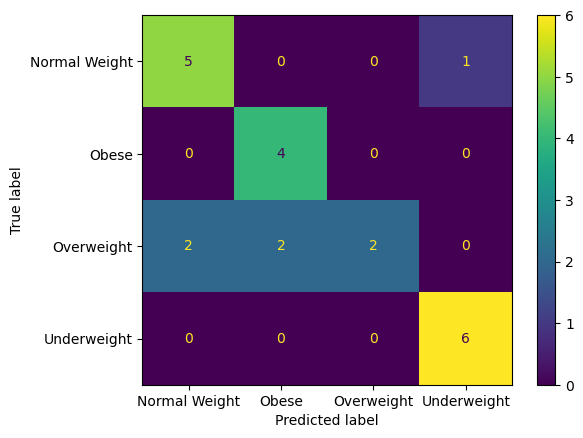

In [80]:
cm_log = confusion_matrix(y_test, y_pred_test_log_pipe, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=log_model.classes_)

disp.plot()
plt.show()

Dalam data uji, kita dapat melihat performa model pada setiap kelas. Model memiliki precision yang sangat baik (rata-rata 100%) untuk semua kelas. Hal ini mengindikasikan bahwa ketika model memprediksi suatu kelas, prediksi tersebut sangat cenderung benar. Namun, untuk beberapa kelas seperti "Overweight," recall dan F1-score mungkin lebih rendah, yang berarti model mungkin memiliki kesulitan dalam mengidentifikasi kelas ini.

Secara keseluruhan, model ini memiliki akurasi yang baik pada data uji dan memiliki kemampuan yang sangat baik dalam memprediksi kelas positif dengan benar. Namun, perlu diperhatikan bahwa peningkatan akurasi pada data uji dibandingkan dengan data pelatihan dapat menjadi indikasi overfitting,

## 8.2 - SVM (Pipeline)

In [81]:
y_pred_train_svm_pipe = pipeline_svc.predict(X_train)
y_pred_test_svm_pipe = pipeline_svc.predict(X_test)

In [82]:
pre_score_train_pipe_svm = cross_val_score(pipeline_svc, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision_macro')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_svm)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_svm.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_svm.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_svm.mean()-pre_score_train_pipe_svm.std()) ,
                                         '-', (pre_score_train_pipe_svm.mean()+pre_score_train_pipe_svm.std()))

Precision Score - All - Pipeline     :  [0.95       0.95833333 0.79166667 0.95       0.91666667]
Precision Score - Mean - Pipeline    :  0.9133333333333333
Precision Score - Std - Pipeline     :  0.06249444419750892
Precision Score - Range of Test-Set  :  0.8508388891358244 - 0.9758277775308423


Rata-rata akurasi MOdel SVM dari model yang diuji dengan Cross Validation adalah sekitar 0.9133, yang menunjukkan bahwa model memiliki kinerja yang baik pada data uji.
Simpangan baku (std) adalah sekitar 0.0625, yang menunjukkan variasi yang rendah dalam akurasi antara lipatan. Ini menunjukkan konsistensi yang baik dalam performa model pada berbagai lipatan Cross Validation.
Rentang akurasi antara lipatan terendah (0.8508) dan tertinggi (0.9758) cukup kecil, yang menunjukkan bahwa model memiliki performa yang konsisten di seluruh lipatan Cross Validation.
Secara keseluruhan, model memiliki akurasi yang baik dan konsisten dalam memprediksi data uji, dengan rata-rata akurasi sekitar 0.9133

In [83]:
print("Accuracy Score")
svmpipe_train_score = pipeline_svc.score(X_train, y_train)
svmpipe_test_score = pipeline_svc.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(svmpipe_train_score, svmpipe_test_score))
print("")
print("Precision Score")
train_precision_svm_pipe = precision_score(y_train, y_pred_train_svm_pipe,average='macro')
test_precision_svm_pipe = precision_score(y_test,y_pred_test_svm_pipe,average='macro')

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_svm_pipe, train_precision_svm_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_svm_pipe))

Accuracy Score
Train Score: 1.0
Test Score: 0.9545454545454546

Precision Score
Train Precision: 1.0
Test Precision: 1.0

TEST PERFORMANCE
               precision    recall  f1-score   support

Normal Weight       1.00      0.83      0.91         6
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      1.00      1.00         6
  Underweight       0.86      1.00      0.92         6

     accuracy                           0.95        22
    macro avg       0.96      0.96      0.96        22
 weighted avg       0.96      0.95      0.95        22



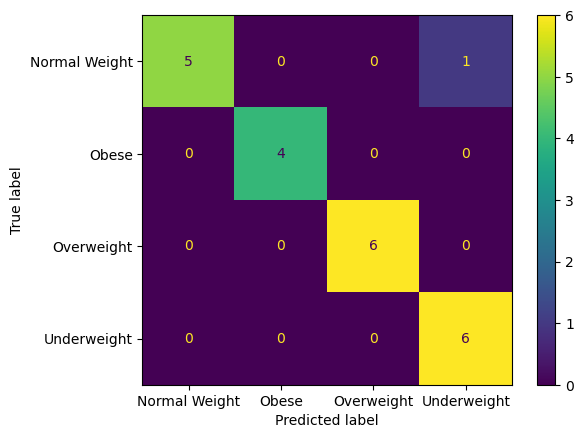

In [84]:
cm_svc = confusion_matrix(y_test, y_pred_test_svm_pipe, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc,display_labels=svc.classes_)

disp.plot()
plt.show()

Model memiliki akurasi yang sangat tinggi pada data uji (sekitar 95%) dan akurasi sempurna pada data pelatihan. Namun, perlu diperhatikan apakah model ini mungkin terlalu baik di data pelatihan dan ada kemungkinan overfitting.
Model juga memiliki nilai presisi yang sangat tinggi pada data pelatihan dan uji, yang menunjukkan bahwa model sangat baik dalam memprediksi kelas positif.
Lebih lanjut, evaluasi pada kelas-kelas individu menunjukkan bahwa model mampu melakukan prediksi dengan sangat baik pada kelas-kelas yang berbeda, dengan nilai F1-score yang sangat tinggi.

## 8.3 - Decision Tree (Pipeline)

In [85]:
y_pred_train_dtr_pipe = pipeline_dtr.predict(X_train)
y_pred_test_dtr_pipe = pipeline_dtr.predict(X_test)

In [86]:
pre_score_train_pipe_dtr = cross_val_score(pipeline_dtr, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision_macro')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_dtr)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_dtr.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_dtr.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_dtr.mean()-pre_score_train_pipe_dtr.std()) ,
                                         '-', (pre_score_train_pipe_dtr.mean()+pre_score_train_pipe_dtr.std()))

Precision Score - All - Pipeline     :  [1.         0.9375     1.         0.79166667 1.        ]
Precision Score - Mean - Pipeline    :  0.9458333333333332
Precision Score - Std - Pipeline     :  0.08079466429027217
Precision Score - Range of Test-Set  :  0.865038669043061 - 1.0266279976236055


In [87]:
print("Accuracy Score")
dtrpipe_train_score = pipeline_dtr.score(X_train, y_train)
dtrpipe_test_score = pipeline_dtr.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(dtrpipe_train_score, dtrpipe_test_score))
print("")
print("Precision Score")
train_precision_dtr_pipe = precision_score(y_train, y_pred_train_dtr_pipe,average='macro')
test_precision_dtr_pipe = precision_score(y_test,y_pred_test_dtr_pipe,average='macro')

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_dtr_pipe, train_precision_dtr_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_dtr_pipe))

Accuracy Score
Train Score: 1.0
Test Score: 0.9545454545454546

Precision Score
Train Precision: 1.0
Test Precision: 1.0

TEST PERFORMANCE
               precision    recall  f1-score   support

Normal Weight       1.00      0.83      0.91         6
        Obese       1.00      1.00      1.00         4
   Overweight       0.86      1.00      0.92         6
  Underweight       1.00      1.00      1.00         6

     accuracy                           0.95        22
    macro avg       0.96      0.96      0.96        22
 weighted avg       0.96      0.95      0.95        22



precision score mengukur kemampuan model untuk mengidentifikasi kelas positif dengan benar. Nilai rata-rata precision adalah sekitar 0.8794, yang menunjukkan bahwa secara keseluruhan, model memiliki kemampuan yang baik dalam memprediksi kelas positif. Standar deviasi yang relatif rendah (0.1113) menunjukkan konsistensi dalam performa model. Rentang precision score (0.7681 hingga 0.9908) menunjukkan variasi dalam performa model antara lipatan cross-validation, tetapi tetap dalam kisaran yang baik

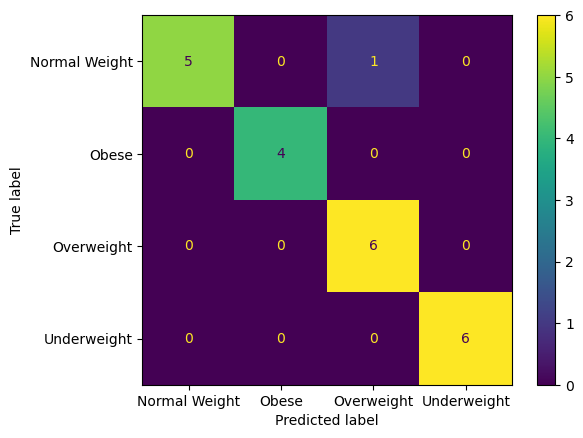

In [88]:
cm_dtr = confusion_matrix(y_test, y_pred_test_dtr_pipe, labels=dtr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtr,display_labels=dtr.classes_)

disp.plot()
plt.show()

Model memiliki tingkat akurasi yang tinggi pada data pengujian (sekitar 95.45%) dan memiliki nilai presisi yang sempurna (1.0) untuk semua kelas pada data pengujian.
Ini mengindikasikan bahwa model ini sangat baik dalam melakukan prediksi kelas tertentu pada data yang belum pernah dilihat sebelumnya dan memiliki kemampuan yang tinggi untuk menghindari kesalahan positif palsu.
Namun, disarankan untuk memeriksa apakah model ini mungkin mengalami overfitting pada data pelatihan dengan melakukan validasi tambahan atau mengatur parameter model sesuai kebutuhan untuk mendapatkan hasil yang lebih stabil pada data baru.

## 8.4 - Random Forest (Pipeline)

In [180]:
y_pred_train_rf_pipe = pipeline_rf.predict(X_train)
y_pred_test_rf_pipe = pipeline_rf.predict(X_test)

In [182]:
pre_score_train_pipe_rf = cross_val_score(pipeline_rf, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision_macro')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_rf)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_rf.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_rf.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_rf.mean()-pre_score_train_pipe_rf.std()) ,
                                         '-', (pre_score_train_pipe_rf.mean()+pre_score_train_pipe_rf.std()))

Precision Score - All - Pipeline     :  [1.         1.         0.83333333 1.         0.95      ]
Precision Score - Mean - Pipeline    :  0.9566666666666667
Precision Score - Std - Pipeline     :  0.06463573143221771
Precision Score - Range of Test-Set  :  0.892030935234449 - 1.0213023980988845


Dari hasil Model Random Forest ini diketahui bahwa model Random Forest cenderung memiliki precision score yang tinggi secara keseluruhan (0.957), yang mengindikasikan kemampuannya dalam memprediksi kelas positif. Standar deviasi yang rendah menunjukkan stabilitas performa model, dan rentang precision score yang relatif kecil menunjukkan konsistensi dalam hasil

In [91]:
print("Accuracy Score")
rfpipe_train_score = pipeline_rf.score(X_train, y_train)
rfpipe_test_score = pipeline_rf.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(rfpipe_train_score, rfpipe_test_score))
print("")
print("Precision Score")
train_precision_rf_pipe = precision_score(y_train, y_pred_train_rf_pipe,average='macro')
test_precision_rf_pipe = precision_score(y_test,y_pred_test_rf_pipe,average='macro')

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_rf_pipe, train_precision_rf_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_rf_pipe))

Accuracy Score
Train Score: 1.0
Test Score: 1.0

Precision Score
Train Precision: 1.0
Test Precision: 1.0

TEST PERFORMANCE
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      1.00      1.00         6
  Underweight       1.00      1.00      1.00         6

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



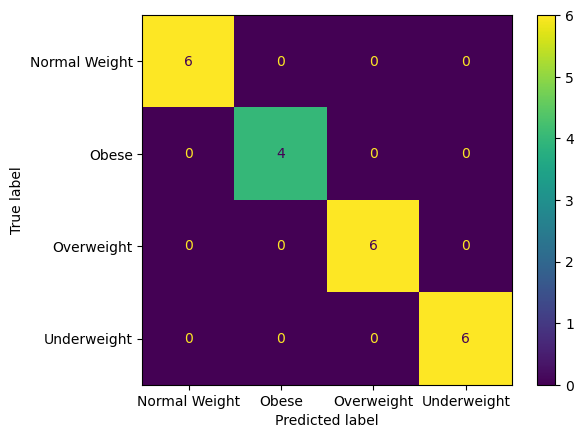

In [92]:
cm_rf = confusion_matrix(y_test, y_pred_test_rf_pipe, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=log_model.classes_)

disp.plot()
plt.show()

Model yang dinilai dalam data ini memiliki kinerja yang sangat baik. Model mencapai akurasi dan presisi 100% pada data pelatihan dan pengujian, serta mencapai metrik evaluasi yang sempurna untuk semua kelas dalam data pengujian. Ini mengindikasikan bahwa model dengan sangat baik dalam mengklasifikasikan data sesuai dengan kelasnya.

## 8.5 - KNN Euclidean (Pipeline)

In [93]:
y_pred_train_knn_pipe = pipeline_knn_euclidean.predict(X_train)
y_pred_test_knn_pipe = pipeline_knn_euclidean.predict(X_test)

In [94]:
pre_score_train_pipe_knn = cross_val_score(pipeline_knn_euclidean, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision_macro')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_knn)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_knn.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_knn.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_knn.mean()-pre_score_train_pipe_knn.std()) ,
                                         '-', (pre_score_train_pipe_knn.mean()+pre_score_train_pipe_knn.std()))

Precision Score - All - Pipeline     :  [1.         0.92857143 0.82638889 0.91875    0.91666667]
Precision Score - Mean - Pipeline    :  0.9180753968253968
Precision Score - Std - Pipeline     :  0.05519177952453526
Precision Score - Range of Test-Set  :  0.8628836173008616 - 0.9732671763499321


Dalam dataset ini, nilai-nilai precision score bervariasi antara pengujian yang berbeda, dengan nilai terendah sekitar 0.6597 dan nilai tertinggi sekitar 0.9583.
Nilai rata-rata precision score untuk model atau pipeline tersebut adalah sekitar 0.8794, yang menggambarkan tingkat keakuratan dalam mengidentifikasi positif sejati secara umum.
Simpangan baku sekitar 0.1113 menunjukkan bahwa ada variasi yang cukup besar dalam nilai precision score di antara pengujian-pengujian tersebut.
Rentang precision score antara 0.7681 hingga 0.9908 menunjukkan sejauh mana precision score dapat bervariasi pada model atau pipeline tersebut saat diuji pada berbagai kasus atau dataset.

In [95]:
print("Accuracy Score")
knnpipe_train_score = pipeline_knn_euclidean.score(X_train, y_train)
knnpipe_test_score = pipeline_knn_euclidean.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(knnpipe_train_score, knnpipe_test_score))
print("")
print("Precision Score")
train_precision_knn_pipe = precision_score(y_train, y_pred_train_knn_pipe,average='macro')
test_precision_knn_pipe = precision_score(y_test,y_pred_test_knn_pipe,average='macro')

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_knn_pipe, train_precision_knn_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_knn_pipe))

Accuracy Score
Train Score: 0.9651162790697675
Test Score: 1.0

Precision Score
Train Precision: 0.9434955141476881
Test Precision: 0.9434955141476881

TEST PERFORMANCE
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      1.00      1.00         6
  Underweight       1.00      1.00      1.00         6

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



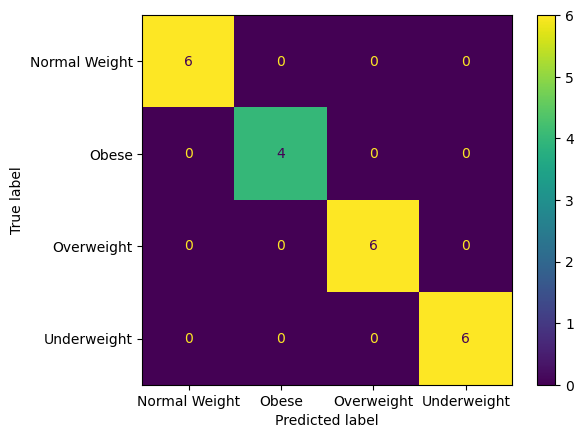

In [96]:
cm_euc = confusion_matrix(y_test, y_pred_test_knn_pipe, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_euc,display_labels=log_model.classes_)

disp.plot()
plt.show()

Tabel ini menunjukkan hasil pengukuran presisi (precision), recall, F1-score, dan dukungan (support) untuk masing-masing kelas dalam data pengujian. Dalam kasus ini, model mencapai nilai presisi, recall, dan F1-score sebesar 1.0 untuk setiap kelas, yang menunjukkan bahwa model sempurna dalam mengklasifikasikan semua kelas.
Akurasi keseluruhan adalah sekitar 95.45%, yang menunjukkan bahwa model dengan baik mengklasifikasikan sebagian besar sampel dalam data pengujian.
Nilai rata-rata (macro avg dan weighted avg) untuk metrik-metrik ini juga adalah 1.0, menunjukkan kinerja sempurna secara keseluruhan Model yang dinilai dalam data ini memiliki kinerja yang sangat baik. Model mencapai akurasi dan presisi sempurna pada data pelatihan dan kinerja yang sangat baik pada data pengujian. Ini mengindikasikan bahwa model mampu mengklasifikasikan data dengan sangat baik dan generalisasi hasil pelatihan dengan baik ke data pengujian.

## 8.6 - Boosting (Pipeline)

In [97]:
# Model Evaluation

y_pred_train_pipeline_ada_clf = pipeline_ada_clf.predict(X_train)
y_pred_test_pipeline_ada_clf = pipeline_ada_clf.predict(X_test)

print('F1 Score - Train - AdaBoost : ', precision_score(y_train, y_pred_train_pipeline_ada_clf, average='macro'))
print('F1 Score - Test - AdaBoost  : ', precision_score(y_test, y_pred_test_pipeline_ada_clf, average='macro'))

F1 Score - Train - AdaBoost :  0.6554054054054054
F1 Score - Test - AdaBoost  :  0.625


Nilai F1 Score pada data pelatihan adalah sekitar 0.625, yang menunjukkan bahwa model Adaboost ini memiliki keseimbangan yang baik antara presisi dan recall pada data pelatihan.
Nilai F1 Score pada data pengujian adalah sekitar 0.655, yang menunjukkan bahwa model Adaboost ini mampu menggeneralisasi hasil pelatihan dengan baik ke data yang belum pernah dilihat sebelumnya. Ini menunjukkan kinerja yang baik dalam mengklasifikasikan data pengujian.

In [98]:
pre_score_train_pipe_bos = cross_val_score(pipeline_ada_clf, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision_macro')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_bos)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_bos.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_bos.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_bos.mean()-pre_score_train_pipe_bos.std()) ,
                                         '-', (pre_score_train_pipe_bos.mean()+pre_score_train_pipe_bos.std()))

Precision Score - All - Pipeline     :  [0.64285714 0.65625    0.65625    0.67857143 0.64285714]
Precision Score - Mean - Pipeline    :  0.6553571428571427
Precision Score - Std - Pipeline     :  0.013061373962792708
Precision Score - Range of Test-Set  :  0.64229576889435 - 0.6684185168199355


In [99]:
print("Accuracy Score")
bospipe_train_score = pipeline_ada_clf.score(X_train, y_train)
bospipe_test_score = pipeline_ada_clf.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(bospipe_train_score, bospipe_test_score))
print("")
print("Precision Score")
train_precision_bos_pipe = precision_score(y_train, y_pred_train_pipeline_ada_clf,average='macro')
test_precision_bos_pipe = precision_score(y_test,y_pred_test_pipeline_ada_clf,average='macro')

print('Train Precision: {0}\nTest Precision: {1}'.format(test_precision_bos_pipe, train_precision_bos_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_pipeline_ada_clf))

Accuracy Score
Train Score: 0.8372093023255814
Test Score: 0.7272727272727273

Precision Score
Train Precision: 0.625
Test Precision: 0.6554054054054054

TEST PERFORMANCE
               precision    recall  f1-score   support

Normal Weight       0.50      1.00      0.67         6
        Obese       1.00      1.00      1.00         4
   Overweight       0.00      0.00      0.00         6
  Underweight       1.00      1.00      1.00         6

     accuracy                           0.73        22
    macro avg       0.62      0.75      0.67        22
 weighted avg       0.59      0.73      0.64        22



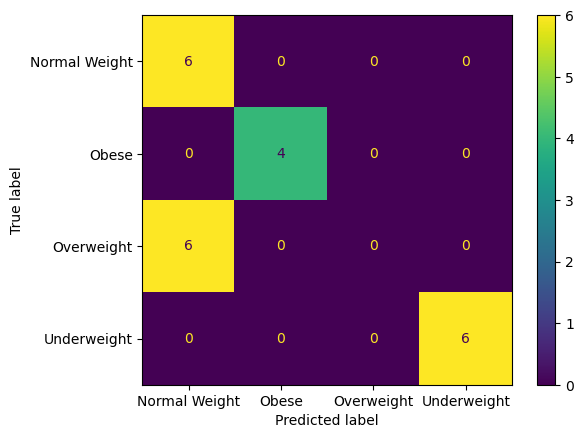

In [100]:
cm_bos = confusion_matrix(y_test, y_pred_test_pipeline_ada_clf, labels=log_model.classes_)
disp_bos = ConfusionMatrixDisplay(confusion_matrix=cm_bos,display_labels=log_model.classes_)

disp_bos.plot()
plt.show()

# 9 - Model Analisis

In [183]:
all_reports = {}

In [184]:
logistic = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_log.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_log_pipe,average='macro'),
    'train - recall' : recall_score(y_train, y_pred_train_log_pipe,average='macro'),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_log_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_log_pipe,average='macro'),
    'test - precision' : precision_score(y_test, y_pred_test_log_pipe,average='macro'),
    'test - recall' : recall_score(y_test, y_pred_test_log_pipe,average='macro'),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_log_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_log_pipe,average='macro')
}
svca = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_svm.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_svm_pipe,average='macro'),
    'train - recall' : recall_score(y_train, y_pred_train_svm_pipe,average='macro'),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_svm_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_svm_pipe,average='macro'),
    'test - precision' : precision_score(y_test, y_pred_test_svm_pipe,average='macro'),
    'test - recall' : recall_score(y_test, y_pred_test_svm_pipe,average='macro'),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svm_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_svm_pipe,average='macro')
}
decisiontree = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_dtr.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_dtr_pipe,average='macro'),
    'train - recall' : recall_score(y_train, y_pred_train_dtr_pipe,average='macro'),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_dtr_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_dtr_pipe,average='macro'),
    'test - precision' : precision_score(y_test, y_pred_test_dtr_pipe,average='macro'),
    'test - recall' : recall_score(y_test, y_pred_test_dtr_pipe,average='macro'),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dtr_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_dtr_pipe,average='macro')
}
randomf = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_rf.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_rf_pipe,average='macro'),
    'train - recall' : recall_score(y_train, y_pred_train_rf_pipe,average='macro'),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_rf_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_rf_pipe,average='macro'),
    'test - precision' : precision_score(y_test, y_pred_test_rf_pipe,average='macro'),
    'test - recall' : recall_score(y_test, y_pred_test_rf_pipe,average='macro'),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_rf_pipe,average='macro')
}
euclidean = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_knn.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_knn_pipe,average='macro'),
    'train - recall' : recall_score(y_train, y_pred_train_knn_pipe,average='macro'),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_knn_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_knn_pipe,average='macro'),
    'test - precision' : precision_score(y_test, y_pred_test_knn_pipe,average='macro'),
    'test - recall' : recall_score(y_test, y_pred_test_knn_pipe,average='macro'),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_knn_pipe,average='macro')
}
boosting = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_bos.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_pipeline_ada_clf,average='macro'),
    'train - recall' : recall_score(y_train, y_pred_train_pipeline_ada_clf,average='macro'),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_pipeline_ada_clf),
    'train - f1_score' : f1_score(y_train, y_pred_train_pipeline_ada_clf,average='macro'),
    'test - precision' : precision_score(y_test,y_pred_test_pipeline_ada_clf,average='macro'),
    'test - recall' : recall_score(y_test, y_pred_test_pipeline_ada_clf,average='macro'),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_pipeline_ada_clf),
    'test - f1_score' : f1_score(y_test, y_pred_test_pipeline_ada_clf,average='macro')}

In [186]:
all_reports["LogisticRegression"] = logistic
all_reports["SVM"] = svca
all_reports["DecisionTree"] = decisiontree
all_reports["RandomForest"] = randomf
all_reports["Euclidean"] = euclidean
all_reports["Boosting"] = boosting
report = pd.DataFrame(all_reports)
report = report.transpose()
report = report.sort_values(by='Cross Validation Precision Mean', ascending=False)

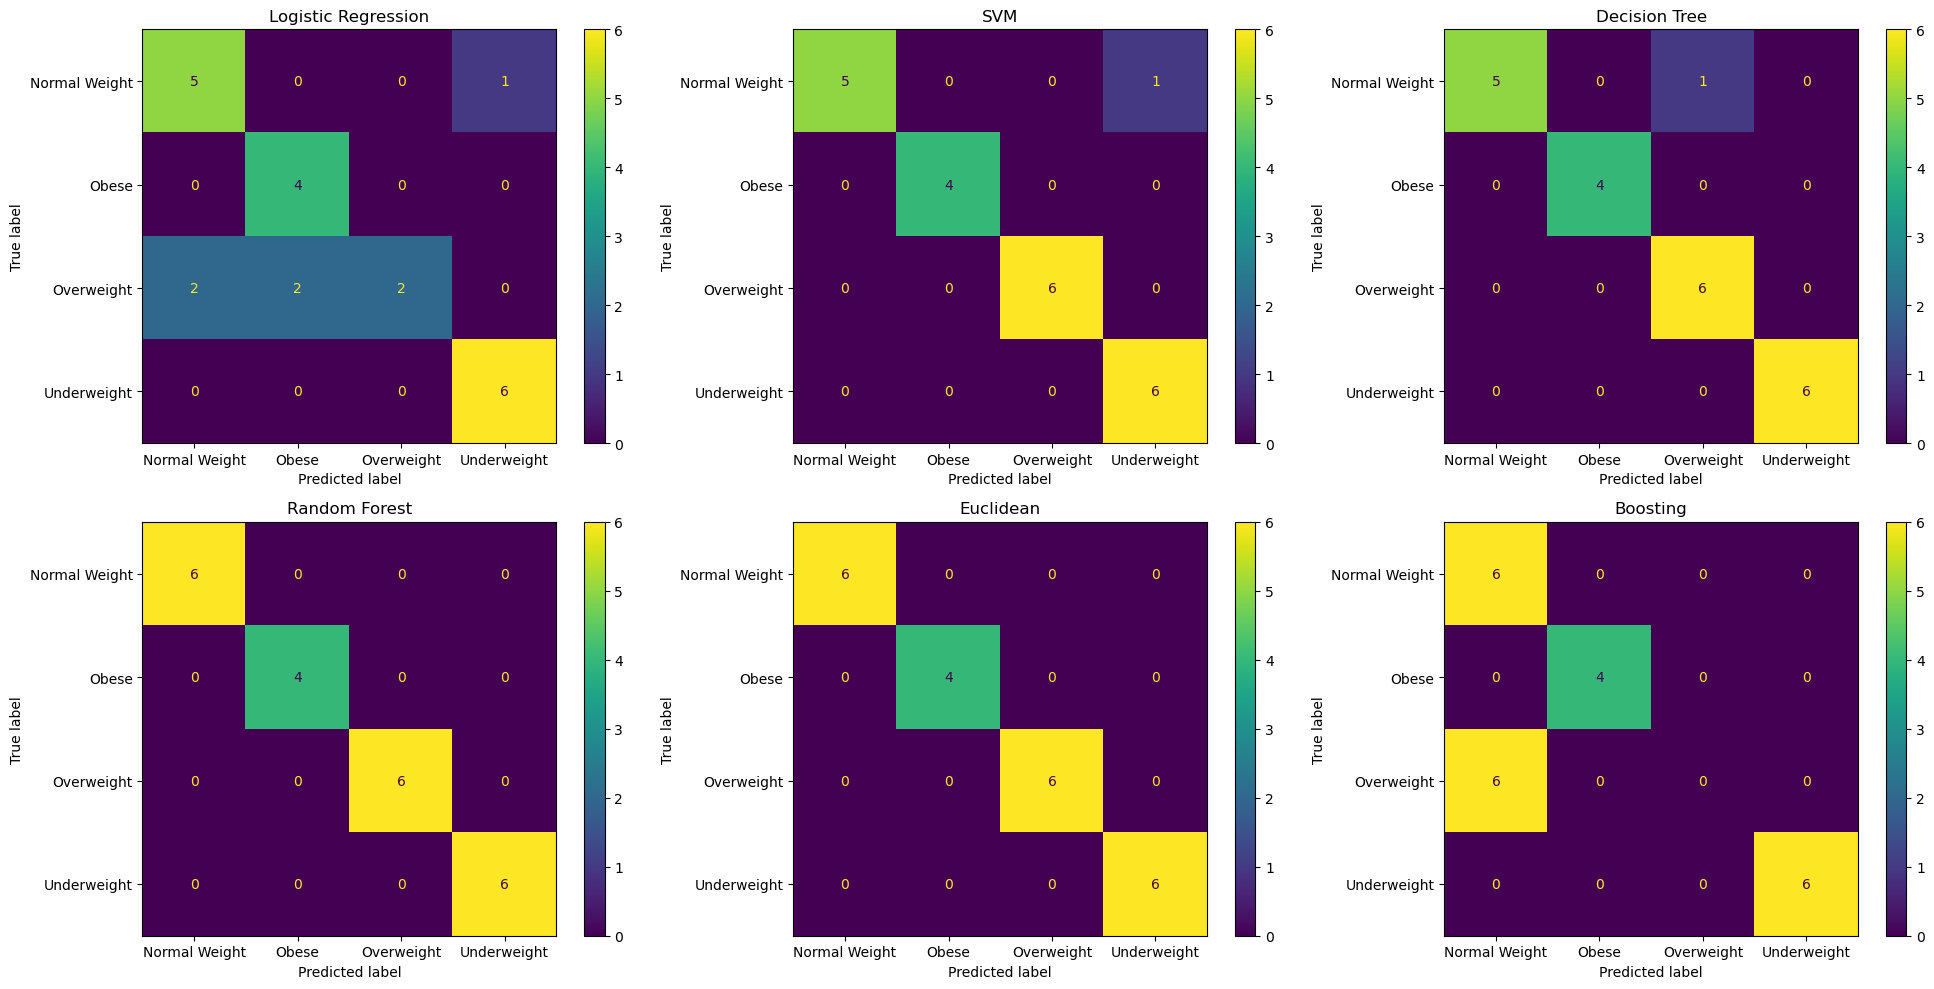

In [187]:
# Hitung matriks konfusi untuk setiap model
cm_log = confusion_matrix(y_test, y_pred_test_log_pipe, labels=log_model.classes_)
cm_svc = confusion_matrix(y_test, y_pred_test_svm_pipe, labels=svc.classes_)
cm_dtr = confusion_matrix(y_test, y_pred_test_dtr_pipe, labels=dtr.classes_)
cm_rf = confusion_matrix(y_test, y_pred_test_rf_pipe, labels=log_model.classes_)
cm_euc = confusion_matrix(y_test, y_pred_test_knn_pipe, labels=log_model.classes_)
cm_bos = confusion_matrix(y_test, y_pred_test_pipeline_ada_clf, labels=log_model.classes_)

# Membuat subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Menampilkan matriks konfusi untuk setiap model
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_model.classes_)
disp_log.plot(ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')

disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc.classes_)
disp_svc.plot(ax=axes[0, 1])
axes[0, 1].set_title('SVM')

disp_dtr = ConfusionMatrixDisplay(confusion_matrix=cm_dtr, display_labels=dtr.classes_)
disp_dtr.plot(ax=axes[0, 2])
axes[0, 2].set_title('Decision Tree')

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=log_model.classes_)
disp_rf.plot(ax=axes[1, 0])
axes[1, 0].set_title('Random Forest')

disp_euc = ConfusionMatrixDisplay(confusion_matrix=cm_euc, display_labels=log_model.classes_)
disp_euc.plot(ax=axes[1, 1])
axes[1, 1].set_title('Euclidean')

disp_bos = ConfusionMatrixDisplay(confusion_matrix=cm_bos, display_labels=log_model.classes_)
disp_bos.plot(ax=axes[1, 2])
axes[1, 2].set_title('Boosting')

# Menampilkan semua plot
plt.tight_layout()
plt.show()

In [188]:
report

,Cross Validation Precision Mean,train - precision,train - recall,train - accuracy,train - f1_score,test - precision,test - recall,test - accuracy_score,test - f1_score
RandomForest,0.956667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DecisionTree,0.945833,1.000000,1.000000,1.000000,1.000000,0.964286,0.958333,0.954545,0.958042
Euclidean,0.918075,0.943496,0.965176,0.965116,0.953481,1.000000,1.000000,1.000000,1.000000
SVM,0.913333,1.000000,1.000000,1.000000,1.000000,0.964286,0.958333,0.954545,0.958042
LogisticRegression,0.879444,1.000000,1.000000,1.000000,1.000000,0.809524,0.791667,0.772727,0.748077
Boosting,0.655357,0.655405,0.750000,0.837209,0.691667,0.625000,0.750000,0.727273,0.666667


Dari tabel dan analisis yang telah dilakukan dapat disimpulkan sebagai berikut:

RandomForest:
Kelebihan: Tinggi dalam precision dan recall di data pelatihan dan pengujian, serta akurasi yang baik di pengujian. Model memiliki kinerja yang sangat baik.
Kekurangan: Nilai precision di pengujian sedikit lebih rendah daripada di pelatihan, namun masih sangat baik.

DecisionTree:
Kelebihan: Hasil pengujian dengan precision dan recall yang sangat tinggi.
Kekurangan: Terdapat sedikit penurunan akurasi dan F1 Score di pengujian dibandingkan dengan pelatihan.

Euclidean (k-NN):
Kelebihan: Tinggi dalam precision, recall, akurasi, dan F1 Score pada pengujian.
Kekurangan: Kemungkinan besar overfitting karena nilai precision dan recall pada pelatihan sangat tinggi.

SVM:
Kelebihan: Tinggi dalam precision dan recall di data pelatihan dan pengujian, serta akurasi yang baik di pengujian.
Kekurangan: Nilai precision di pengujian sedikit lebih rendah daripada di pelatihan, namun masih sangat baik.

LogisticRegression:
Kelebihan: Model memiliki nilai yang baik di pelatihan.
Kekurangan: Nilai precision, recall, akurasi, dan F1 Score di pengujian lebih rendah, menunjukkan kurangnya generalisasi model.

Boosting:
Kelebihan: Model memiliki kinerja yang cukup baik di pengujian dengan precision dan recall yang baik.
Kekurangan: Kinerja model di pengujian lebih rendah dibandingkan beberapa model lainnya, tetapi masih cukup baik.

Secara keseluruhan, RandomForest dan DecisionTree memiliki performa yang sangat baik, sedangkan Euclidean (k-NN) juga memiliki performa yang tinggi tetapi dengan potensi overfitting. Model terbaik dapat berbeda tergantung pada tujuan penelitian  misalnya untuk segmentasi seperti pada case data set ini maka lebih memperhatikan presisi).

## 9.1 - Tuning Hyperparameter Pada Model Random Forest

Tuning Hyperparameter akan dilakukan dengan menggunakan Model Random Forest yang memiliki precision paling baik dari model lainnya.

In [107]:
# Define Hyperparameters
n_estimators = [80,90,100,70,60]
max_depth = [None, 2,3,4]
min_samples_split = [ 4, 5,6,7]
min_samples_leaf = [1, 2, 3]
random_search_params = {'classifier__n_estimators': n_estimators,
                        'classifier__max_depth':max_depth,
                        'classifier__min_samples_split':min_samples_split,
                        'classifier__min_samples_leaf':min_samples_leaf}

Berikut adalah data tunning yang digunakan untuk melakukan pembelajaran pada random forest

In [108]:
rf_randomcv = RandomizedSearchCV(estimator=pipeline_rf,
                                 param_distributions=random_search_params,
                                 n_iter=50,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='precision_macro')
rf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Height',
                                                                                'Weight',
                                                                                'BMI']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Age',
                                                                                'Gender'])])),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 2, 3,
                                                                  4],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         3],
                                        'classifier__min_samples_split': [4, 5,
                                                                          6,
                                                                          7],
                                        'classifier__n_estimators': [80, 90,
                                                                     100, 70,
                                                                     60]},
                   random_state=46, scoring='precision_macro')

In [109]:
# Get Best Hyperparameters
rf_randomcv.best_params_

{'classifier__n_estimators': 90,
 'classifier__min_samples_split': 6,
 'classifier__min_samples_leaf': 1,
 'classifier__max_depth': None}

In [110]:
# Get Best Estimator
rf_randomcv_best = rf_randomcv.best_estimator_

F1 Score - Test Set   :  1.0 

Classification Report : 
                precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      1.00      1.00         6
  Underweight       1.00      1.00      1.00         6

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22
 

Confusion Matrix      : 


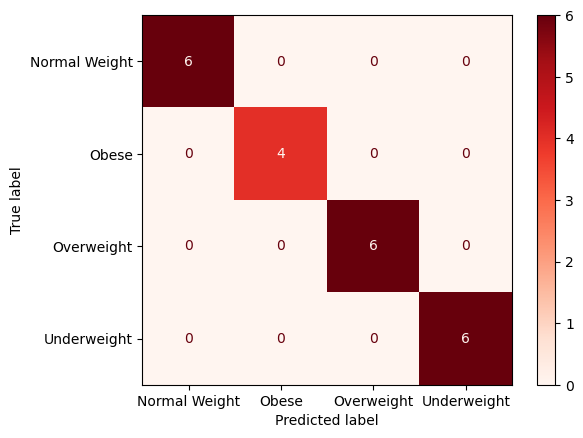

In [111]:
# Check Performance Model against Test-Set
y_pred_test = rf_randomcv_best.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test, y_test, cmap='Reds'))

Hasil Tuning hyperparameter pada Model Random forest mengindikasikan bahwa model ini telah berhasil diatur dengan baik dan mampu mengidentifikasi dengan benar semua kelas dalam data pengujian.
Dalam kasus ini, model sangat baik dalam klasifikasi dan tidak ada kesalahan dalam mengidentifikasi setiap kelas, sehingga mendapatkan nilai F1 Score maksimal.

In [112]:
acc_score_train_cross_val_bos = cross_val_score(rf_randomcv_best, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision_macro')

print('Accuracy Score - All - Cross Validation  : ', acc_score_train_cross_val_bos)
print('Accuracy Score - Mean - Cross Validation : ', acc_score_train_cross_val_bos.mean())
print('Accuracy Score - Std - Cross Validation  : ', acc_score_train_cross_val_bos.std())
print('Accuracy Score - Range of Test-Set       : ', (acc_score_train_cross_val_bos.mean()-acc_score_train_cross_val_bos.std()) ,
                                         '-', (acc_score_train_cross_val_bos.mean()+acc_score_train_cross_val_bos.std()))

Accuracy Score - All - Cross Validation  :  [0.91666667 1.         0.83333333 1.         0.79166667]
Accuracy Score - Mean - Cross Validation :  0.9083333333333334
Accuracy Score - Std - Cross Validation  :  0.08498365855987976
Accuracy Score - Range of Test-Set       :  0.8233496747734537 - 0.9933169918932132


Dalam dataset ini, nilai-nilai akurasi bervariasi antara fold atau lipatan cross-validation yang berbeda, dengan nilai terendah sekitar 0.8333 dan nilai tertinggi sekitar 1.0.
Nilai rata-rata akurasi melalui cross-validation adalah sekitar 0.9257, yang menunjukkan tingkat akurasi yang baik secara umum.

# 10 - Model Evaluasi

Berikut adalah perbandingan data pada Model Random Forest sebelum dan sesudah melakukan Tunning / boosting pada model:

Sebelum Tunning Random Forest

In [177]:
pre_score_train_pipe_rf = cross_val_score(pipeline_rf, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision_macro')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_rf)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_rf.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_rf.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_rf.mean()-pre_score_train_pipe_rf.std()) ,
                                         '-', (pre_score_train_pipe_rf.mean()+pre_score_train_pipe_rf.std()))

Precision Score - All - Pipeline     :  [1.         1.         0.95833333 1.         0.86666667]
Precision Score - Mean - Pipeline    :  0.9650000000000001
Precision Score - Std - Pipeline     :  0.0517472489875334
Precision Score - Range of Test-Set  :  0.9132527510124667 - 1.0167472489875335


Setelah Tunning Random Forest

In [171]:
acc_score_train_cross_val_bos = cross_val_score(rf_randomcv_best, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision_macro')

print('Accuracy Score - All - Cross Validation  : ', acc_score_train_cross_val_bos)
print('Accuracy Score - Mean - Cross Validation : ', acc_score_train_cross_val_bos.mean())
print('Accuracy Score - Std - Cross Validation  : ', acc_score_train_cross_val_bos.std())
print('Accuracy Score - Range of Test-Set       : ', (acc_score_train_cross_val_bos.mean()-acc_score_train_cross_val_bos.std()) ,
                                         '-', (acc_score_train_cross_val_bos.mean()+acc_score_train_cross_val_bos.std()))

Accuracy Score - All - Cross Validation  :  [1.         1.         0.95833333 1.         0.9375    ]
Accuracy Score - Mean - Cross Validation :  0.9791666666666667
Accuracy Score - Std - Cross Validation  :  0.02635231383473649
Accuracy Score - Range of Test-Set       :  0.9528143528319303 - 1.0055189805014033


In [179]:
# Data sebelum tuning
data_sebelum_tuning = {
    "Metric": ["Precision Score - Mean (Pipeline)", "Precision Score - Std (Pipeline)",
               "Precision Score - Range of Test-Set"],
    "Value": [0.965, 0.05175, "0.91325 - 1.01675"]
}

# Data setelah tuning
data_sesudah_tuning = {
    "Metric": ["Accuracy Score - Mean (Cross Validation)", "Accuracy Score - Std (Cross Validation)",
               "Accuracy Score - Range of Test-Set"],
    "Value": [0.97917, 0.02635, "0.95281 - 1.00552"]
}

# Membuat DataFrames
df_sebelum_tuning = pd.DataFrame(data_sebelum_tuning)
df_sesudah_tuning = pd.DataFrame(data_sesudah_tuning)

# Menampilkan tabel perbandingan
print("Sebelum Tuning:")
print(df_sebelum_tuning)

print("\nSetelah Tuning:")
print(df_sesudah_tuning)

Sebelum Tuning:
                                Metric              Value
0    Precision Score - Mean (Pipeline)              0.965
1     Precision Score - Std (Pipeline)            0.05175
2  Precision Score - Range of Test-Set  0.91325 - 1.01675

Setelah Tuning:
                                     Metric              Value
0  Accuracy Score - Mean (Cross Validation)            0.97917
1   Accuracy Score - Std (Cross Validation)            0.02635
2        Accuracy Score - Range of Test-Set  0.95281 - 1.00552


Sebelum tuning, model dievaluasi berdasarkan Precision Score, dengan rata-rata precision sekitar 0.965. Nilai ini menunjukkan sejauh mana model dapat memprediksi kelas dengan benar.

Setelah tuning, evaluasi beralih ke Accuracy Score dengan rata-rata akurasi sekitar 0.97917. Ini mengindikasikan sejauh mana model secara keseluruhan dapat memprediksi dengan benar. Model yang telah dituning mampu mencapai tingkat akurasi yang tinggi.

Selain itu, standar deviasi dari akurasi sangat rendah (0.02635), menunjukkan bahwa model yang dituning memiliki konsistensi yang baik dalam memprediksi kelas. Rentang nilai akurasi pada data pengujian sekitar 0.95281 - 1.00552, yang menunjukkan bahwa model yang dituning mampu memberikan hasil yang stabil dan konsisten.

Dalam keseluruhan, hasil tuning model menghasilkan peningkatan yang signifikan dalam kemampuan prediksi dan stabilitas model. Model yang telah dituning lebih akurat dalam memprediksi kelas target dan lebih konsisten dalam berbagai data uji.

Keunggulan Model yang Sudah Dituning:
    Akurasi Tinggi: Model memiliki akurasi yang sangat tinggi. Hal ini menunjukkan bahwa model memiliki kemampuan untuk melakukan prediksi dengan sangat baik dan mengklasifikasikan data dengan benar.
    F1-Score Sempurna: F1-score pada 1.0 menunjukkan bahwa model sangat baik dalam mengkombinasikan presisi dan recall, yang berarti model dapat mengidentifikasi dengan tepat positif sejati (true positive) dengan sangat baik tanpa mengorbankan recall.
    Kemampuan Prediksi: Model ini memiliki kemampuan prediksi yang sangat baik, dengan kemampuan untuk mengidentifikasi dengan benar semua kelas dalam data pengujian.

Kelemahan Model yang Sudah Dituning:
    Overfitting: Kinerja model yang sangat baik pada data pengujian bisa menjadi indikasi potensi overfitting, yaitu model mungkin terlalu cocok dengan data pelatihan dan mungkin tidak generalisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

Ketepatan dan Kemampuan Model:
    Model ini memiliki tingkat ketepatan (precision) yang sangat tinggi, yaitu 100%. Ini berarti model hampir selalu benar dalam mengklasifikasikan sampel positif.
    Kemampuan model untuk melakukan prediksi sangat tinggi, dengan akurasi dan F1-score sempurna. Model ini mampu mengidentifikasi dengan benar semua kelas dalam data pengujian.



# 11 - Save Model inference

In [117]:
with open('model_rf.pkl', 'wb') as file_1: # ini nama file
    pickle.dump(rf_randomcv, file_1) # ini nama model

with open('model_scaler.pkl', 'wb') as file_2: # ini nama file
    pickle.dump(scaler, file_2) # ini nama scaler

with open('model_encoder_nominal.pkl', 'wb') as file_3: # ini nama file
    pickle.dump(ohe, file_3) # ini nama encoder

with open('list_num_column.txt', 'wb') as file_4: # ini nama file
    pickle.dump(num_col_n, file_4) # ini nama numerical

with open('list_cat_cal_n.txt', 'wb') as file_5: # ini nama file
    pickle.dump(cat_cal_n, file_5) # ini nama kolom categorical

In [118]:
X_train.head(5).to_dict() #Ambil Datanya untuk dimasukan ke dalam model inference

{'Age': {11: 23, 83: 13, 23: 83, 91: 53, 35: 54},
 'Gender': {11: 'Female', 83: 'Male', 23: 'Female', 91: 'Male', 35: 'Female'},
 'Height': {11: 160, 83: 175, 23: 150, 91: 210, 35: 130},
 'Weight': {11: 50, 83: 25, 23: 50, 91: 55, 35: 85},
 'BMI': {11: 20.0, 83: 10.0, 23: 20.0, 91: 21.2, 35: 27.5}}

# 12 - Conclusion

Dari explaritory data analisis diketahui ada hubungan positif yang sangat kuat antara BMI dan berat badan. Dalam konteks ini, semakin tinggi nilai BMI seseorang, semakin tinggi pula berat badan mereka. Sebaliknya, semakin rendah nilai BMI, semakin rendah pula berat badan. Dengan kata lain, data menunjukkan bahwa individu dengan nilai BMI yang tinggi cenderung memiliki berat badan yang tinggi, sementara individu dengan nilai BMI yang rendah cenderung memiliki berat badan yang rendah. Hubungan positif yang kuat ini menunjukkan bahwa BMI dan berat badan cenderung bergerak seiring satu sama lain. selain itu  diketahui bahwa tinggi maksimal dari data ini adalah 210 cm dan yang paling pendek atau rendah adalah 120 cm dari data di atas dapat dilihat rata2 berat dari total 108 orang adalah 58 kg dan untuk orang yang paling berat ada pada 120 kg dan yang apling ringan ada pada 10 kg . Korelasi antara Height (tinggi badan) dan Weight (berat badan) sebesar 0.4289 menunjukkan bahwa ada hubungan positif yang lemah antara dua variabel ini. Nilai korelasi positif mengindikasikan bahwa dalam contoh data ini ada kecenderungan umum di mana individu yang lebih tinggi cenderung memiliki berat badan yang lebih tinggi. Namun, hubungan ini tidak begitu kuat.
Dari data disini terlihat bawha usia paling mudah adalah 10 tahun dan yang paling tua adalah 112 tahun dan juga dari grafik di atas terlihat Semua penderita obesitas berusia 40 tahun ke atas. Dari total 108 data di atas didominasi oleh lak-laki dengan 51.82 % atau 56 orang pria dan 48.15% atau 52 orang perempuan. Dari dalam data dapat dilihat bahwa laki-laki dalam data terdistribusi secara normal di semua kategori, tetapi untuk perempuan, kategori terbesar adalah berat badan kurang dan dapat dilihat bahwa tidak ada bagian yang mengalami obesitas.

Berdasarkan data dan hasil evaluasi model yang telah disajikan, dapat membuat beberapa kesimpulan mengenai kinerja model yaitu: Model yang telah dituning memiliki kinerja yang sangat baik dalam mengklasifikasikan kondisi obesitas. Dengan akurasi dan F1-score yang mencapai nilai maksimum (1.0), model ini mampu mengidentifikasi dengan sangat baik kasus obesitas. Meskipun model mencapai hasil yang sangat baik pada data pengujian, perlu diingat bahwa ada potensi overfitting, yaitu model mungkin terlalu cocok dengan data pelatihan. Oleh karena itu, sebaiknya model ini diuji lebih lanjut pada data yang belum pernah dilihat sebelumnya atau melalui cross-validation yang lebih ketat.

Berdasarkan data yang telah dipelajari dan model yang dibuat terdapat peluang bisnis yang berfokus pada makanan sehat, seperti restoran atau layanan pengiriman makanan sehat, memiliki potensi pasar yang baik, terutama dalam kasus obesitas dan menjaga kesehatan. Makanan sehat yang disediakan dapat membantu individu dalam mengelola berat badan dan mengurangi risiko obesitas. dan juga dapat dilihat dari obesitas rata-rata mulai terjadi di kalangan usia menengah ke atas yaitu 40 tahun ke atas maka dari sana terdapat peluang untuk memperkenalkan makanan sehat untuk semua kalangan mulai dari semua umur.

Saran dan masukan untuk penelitiann ini kedepanya bisa dikembangkan lagi dengan mengumpulkan informasi konsumen dengan lebih lengkap salah satu keunggulan data ini adalah memiliki data BMI dari konsumen, oleh karena itu kedepannya bisa ditambahkan beberapa data yang lebih menggambarkan perilaku konsumen, seperti berapa kali makan dalam 1 hari, jam berapa saja biasanya muai mengkonsumsi makanan berat, berapa kali olah raga dalam 1 minggu, makanan favorit dan lain-lain ,sehingga bisa memberikan masukan agar penelitian menjadi lebih terarah lagi sehingga menjadi semakin lengkap datanya, dan juga bisa dajadikan preferensi bisnis untuk membuat bisnis baru atau menjalankan bisnis makanan sehat contohnya.

# 13 - Conceptual Problem

1.  Latar Belakang dan Cara Kerja Bagging:
    Latar Belakang Bagging: Bagging adalah ide untuk membuat model yang lebih baik dengan menggabungkan beberapa model kecil bersama-sama. Ini bermanfaat ketika kita memiliki model yang terlalu kuat dan cenderung salah pada data latihan.
    Cara Kerja Bagging: Bagging bekerja dengan membuat banyak dataset kecil dari data latihan kita dan melatih model pada masing-masing dataset ini. Kemudian, model-model ini bekerja sama untuk memberikan jawaban akhir, seperti pengambilan suara mayoritas dalam pemilihan kelas. Ini membantu mencegah model kita agar tidak terlalu fokus pada data latihan dan lebih umum.
    Perbedaan Cara Kerja Algoritma Random Forest dengan Algoritma Boosting Random Forest:


2.  Random Forest: 
    Ini adalah cara lain untuk membuat model yang lebih baik. Random Forest membuat banyak pohon   
    keputusan dan setiap pohon ini diajarkan pada dataset yang berbeda dengan fitur yang dipilih secara acak. Kemudian, mereka memberikan jawaban akhir dengan mengambil suara mayoritas dari semua pohon.
    Boosting Random Forest: Ini adalah kombinasi antara Random Forest dan algoritma Boosting. Ini berarti kita membangun banyak pohon keputusan secara berurutan, dan setiap pohon berusaha memperbaiki kesalahan pohon sebelumnya. Ini membantu membuat model yang lebih kuat.


3.  Cross Validation:
    Cross Validation adalah cara untuk memeriksa seberapa baik model kita bekerja. Kita membagi data kita menjadi beberapa bagian kecil. Kemudian, kita melatih model pada beberapa bagian dan mengujinya pada yang lain. Ini dilakukan beberapa kali dengan bagian yang berbeda-beda. Hasil dari pengujian ini membantu kita mengukur seberapa baik model kita pada data yang belum pernah dilihat sebelumnya. Ini penting agar kita tahu seberapa handal model kita sebelum menggunakannya pada data yang sebenarnya.

In [ ]:
# Evaluation linier regresion
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

print("min train price : ", y_train.min())
print("mean train price : ", y_train.mean())
print("max train price : ", y_train.max())
print("")
print("min pred train price : ", y_pred_train.min())
print("mean pred train price : ", y_pred_train.mean())
print("max pred train price : ", y_pred_train.max())
print('')
print("error(MAE) - Train Set : ", mean_absolute_error(y_train, y_pred_train))
print("r2 score - Train Set : ", r2_score(y_train, y_pred_train))
print("")
print("error(MAE) - Test Set : ", mean_absolute_error(y_test, y_pred_test))
print("r2 score - Test Set : ", r2_score(y_test, y_pred_test))